<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:200%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Ken Jee's YouTube Data Analysis
    
</h2>
</div>
    
</center>


![image](https://duet-cdn.vox-cdn.com/thumbor/0x0:1680x1050/1440x960/filters:focal(840x525:841x526):no_upscale():format(webp)/cdn0.vox-cdn.com/uploads/chorus_asset/file/9130449/YTLogo_old_new_animation.gif)

## **Table of Contents**

1. [Overview and Problem Statement](#Section1)<br>
2. [Reading the Data](#Section2)<br>
3. [Exploratory Data Analysis](#Section3)<br>
4. [Sentiment Analysis](#Section4)<br>
9. [Summary](#Section5)<br>

<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: mediumseagreen;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Overview and Problem Statement
    
</h2>
</div>
    
</center>


This dataset provides a comprehensive analysis of **Ken Jee's YouTube Channel** with data spanning from Nov 2017 to Jan 2022. The four files in the repository contain valuable insights for addressing several key questions:

1) **Themes of Comment Data**: The dataset allows us to explore the prevalent themes and topics discussed in the comments section of Ken's videos.

2) **Video Titles and Thumbnails Analysis**: By examining the data, we can determine the types of video titles and thumbnails that have been most effective in driving traffic to his channel.

3) **Understanding the Core Audience**: We can identify Ken's core audience and gain insights into their interests and preferences based on their viewing patterns and engagement.

4) **Videos Leading to Growth**: The dataset enables us to discover which types of videos have contributed the most to the growth and success of Ken's channel.

5) **Engaging Content Identification**: Through analysis, we can uncover the type of content that garners the highest levels of engagement and captures viewers' attention for longer durations.

The data encompasses aggregated metrics, including country-specific and subscriber status dimensions, as well as daily performance data for each video. It has been meticulously gathered by Ken himself via the YouTube API and analytics, with a focus on ensuring audience privacy through anonymization.

Let's proceed with this comprehensive dataset to gain valuable insights into the various aspects of Ken Jee's YouTube Channel!

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (22, 5)
plt.rcParams['figure.dpi'] = 100

Now that we have imported all the required libraries and the classes, we start reading the Data with the help of pandas and taking a look at the data.

<a id = Section2></a>

<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: mediumseagreen;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Reading the Data
    
</h2>
</div>
    
</center>

In [7]:
Aggregated_df = pd.read_csv("/content/Aggregated_Metrics_By_Video.csv")
Country_df = pd.read_csv(r"/content/Aggregated_Metrics_By_Country_And_Subscriber_Status.csv")
Video_df = pd.read_csv(r"/content/Video_Performance_Over_Time.csv")
Comments_df = pd.read_csv(r"/content/All_Comments_Final.csv")

In [8]:
Aggregated_df.head()

,Video,Video title,Video pub­lish time,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Av­er­age view dur­a­tion,Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%)
0,Total,NaN,NaN,14197,39640,3902,225021,45790,229241,5.276,11.990,26.61,0:03:25,5568487,317602.3536,183451,29068.652,100954064,3.16
1,4OZip0cgOho,How I Would Learn Data Science (If I Had to St...,"May 8, 2020",907,9583,942,46903,451,46904,6.353,12.835,36.65,0:03:09,1253559,65850.7042,46453,7959.533,26498799,3.14
2,78LjdAAw0wA,100K Channel Update + AMA Stream!,"Nov 12, 2020",412,4,4,130,15,12,2.668,6.259,6.26,0:05:14,2291,200.2966,-3,6.113,188318,0.72
3,hO_YKK_0Qck,Uber Driver to Machine Learning Engineer in 9 ...,"Jul 16, 2020",402,152,15,881,9,198,9.516,11.695,15.12,0:10:21,21350,3687.3387,189,202.963,442334,2.53
4,uXLnbdHMf8w,Why I'm Starting Data Science Over Again.,"Aug 29, 2020",375,367,22,2622,40,1957,3.143,7.943,33.41,0:02:36,49564,2148.3110,1917,155.779,521185,4.01


In [9]:
Country_df.head()

,Video Title,External Video ID,Video Length,Thumbnail link,Country Code,Is Subscribed,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
0,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,HK,True,23,1,0,0,2,0,0.671870,39.640348,0
1,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,ME,True,3,0,0,0,0,0,0.498870,29.433333,0
2,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,RW,True,2,0,0,0,0,0,0.681780,40.225000,0
3,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,US,True,979,81,6,8,16,4,0.694854,40.996389,0
4,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,DE,False,75,3,0,1,0,0,0.661515,39.029373,0


In [10]:
Video_df.head()

,Date,Video Title,External Video ID,Video Length,Thumbnail link,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
0,19 Jan 2022,Kaggle Project From Scratch - Part 2 (Explorat...,KQ80oD_boBM,2191,https://i.ytimg.com/vi/KQ80oD_boBM/hqdefault.jpg,13,0,0,0,0,0,0.069055,151.300154,0
1,19 Jan 2022,Welcome To My Channel | Ken Jee | Data Science,smeFkHwnM_k,51,https://i.ytimg.com/vi/smeFkHwnM_k/hqdefault.jpg,2,0,0,0,1,0,0.471255,24.034000,0
2,19 Jan 2022,How She Dominated the FAANG Data Science Inter...,vfV4nm004VQ,2686,https://i.ytimg.com/vi/vfV4nm004VQ/hqdefault.jpg,10,0,0,0,0,0,0.126049,338.567500,0
3,19 Jan 2022,The 9 Books That Changed My Perspective in 2019,3TrAYmrmA8o,980,https://i.ytimg.com/vi/3TrAYmrmA8o/hqdefault.jpg,1,0,0,0,0,0,0.011508,11.278000,0
4,19 Jan 2022,Interview with the Director of AI Research @ N...,Xgg7dIKys9E,2904,https://i.ytimg.com/vi/Xgg7dIKys9E/hqdefault.jpg,1,0,0,0,0,0,0.007541,21.900000,0


In [11]:
Comments_df.head()

,Comments,Comment_ID,Reply_Count,Like_Count,Date,VidId,user_ID
0,Thanks for this video Ken.\n\nI decided to go ...,UgxFZTIzC4UPyhhX_PZ4AaABAg,0,0,2022-01-22T08:13:29Z,xpIFS6jZbe8,user_981
1,Hello ken jee!!! I'm doing a graduation on Com...,Ugx3IYuAufhb932GYQx4AaABAg,0,0,2022-01-22T01:09:46Z,xpIFS6jZbe8,user_213
2,"Thanks for this video, man. So useful. I'll me...",UgyhwwoK24arzRt1mud4AaABAg,0,0,2022-01-21T23:59:05Z,rEWPqw6rMGI,user_1065
3,Great video!!! I started learning Python 8 mon...,UgwrrI7nd3WClsotmHV4AaABAg,0,0,2022-01-21T23:00:37Z,xpIFS6jZbe8,user_3391
4,Been watching hours of your material (and Tina...,UgxlOrHO4MHKSwY9mUN4AaABAg,0,0,2022-01-21T20:24:20Z,sHRq-LshG3U,user_2816


<a id = Section3></a>

<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: mediumseagreen;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Exploratory Data Analysis
    
</h2>
</div>
    
</center>

EDA, which stands for **Exploratory Data Analysis**, is a critical initial step in the data analysis process. It involves visually and statistically exploring the data to gain insights, identify patterns, detect anomalies, and better understand the structure and characteristics of the dataset. EDA helps data analysts and scientists to become familiar with the data, validate assumptions, and guide the selection of appropriate data preprocessing and modeling techniques.

Key components and techniques used in Exploratory Data Analysis include:

1. **Data Cleaning**: This step involves identifying and handling missing values, duplicates, and outliers that can affect the quality of the analysis. Cleaning the data ensures that subsequent analyses are based on accurate and reliable information.

2. **Descriptive Statistics**: Descriptive statistics provide summary information about the dataset, including measures of central tendency (e.g., mean, median, mode), dispersion (e.g., range, standard deviation), and distribution of the data.

3. **Data Visualization**: Visualizing the data using various plots and charts helps in gaining an intuitive understanding of the data's distribution and patterns. Common visualizations include:

   - Histograms: For displaying the frequency distribution of continuous data.
   - Box Plots: To identify outliers and visualize the spread of the data.
   - Scatter Plots: For examining relationships between two continuous variables.
   - Bar Charts: For categorical data visualization.
   - Heatmaps: To visualize the correlation between variables.
   - Pair Plots: To visualize pairwise relationships in multi-dimensional datasets.

4. **Correlation Analysis**: EDA often includes calculating and visualizing correlations between variables to understand the strength and direction of their relationships. Correlation matrices and heatmaps are commonly used for this purpose.

5. **Distribution Analysis**: Understanding the distribution of data is crucial. EDA helps to identify if the data follows a normal distribution or if it has skewed or bimodal distributions, which can impact the choice of appropriate statistical tests and models.

6. **Feature Engineering**: Exploratory Data Analysis can inspire feature engineering ideas by revealing important interactions or transformations that might enhance the predictive power of machine learning models.

7. **Data Transformation**: EDA may also indicate the need for data transformations such as normalization, scaling, or log transformations to improve model performance.

8. **Hypothesis Generation**: During EDA, analysts might generate hypotheses about relationships or trends in the data. These hypotheses can be further tested and validated in subsequent steps of the analysis.

EDA is NOT a one-time process but an iterative one. As analysts explore the data and make discoveries, they may go back to data cleaning, apply new visualizations, or conduct deeper analyses based on their findings. EDA helps set the stage for more sophisticated modeling, and it is a crucial step in understanding the data's structure and uncovering insights that can inform decision-making and guide further analysis.

In [12]:
Aggregated_df.describe()

,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%)
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,222.000000,224.000000,2.240000e+02,224.000000,224.000000,224.000000,2.240000e+02,224.000000
mean,126.750000,353.924107,34.839286,2008.919643,217.620536,1608.084821,4.442040,11.442779,34.087277,4.971645e+04,2835.711522,1390.464286,259.537433,9.013573e+05,3.084152
std,948.732371,2736.321694,268.668317,15387.274015,3058.766918,15628.834115,1.789148,3.334781,15.118746,3.810302e+05,21662.566897,12647.246927,2011.119492,6.967916e+06,1.670448
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.439000,5.230000,6.000000e+01,1.068400,-21.000000,0.000000,3.650000e+02,0.490000
25%,18.000000,19.000000,1.000000,163.500000,2.000000,27.000000,3.220750,9.379500,23.602500,3.940000e+03,177.037125,19.750000,12.208250,9.947100e+04,1.925000
50%,37.000000,46.500000,4.000000,342.500000,7.000000,70.000000,4.334500,11.169500,35.120000,8.347500e+03,397.852200,62.500000,32.595500,1.541925e+05,2.895000
75%,66.250000,114.250000,11.000000,716.000000,14.000000,245.500000,5.372250,12.901000,43.462500,1.836875e+04,1145.621400,230.500000,96.814750,2.894885e+05,3.975000
max,14197.000000,39640.000000,3902.000000,225021.000000,45790.000000,229241.000000,10.387000,37.786000,76.600000,5.568487e+06,317602.353600,183451.000000,29068.652000,1.009541e+08,11.510000


In [13]:
print('Net Subscribers Gained -', Aggregated_df['Sub­scribers gained'].loc[0]-Aggregated_df['Sub­scribers lost'].loc[0])

Net Subscribers Gained - 183451


In [14]:
Video_df.describe()

,Video Length,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
count,111857.000000,111857.000000,111857.000000,111857.000000,111857.000000,111857.000000,111857.000000,110510.000000,110510.000000,111857.0
mean,874.615876,49.714287,2.095533,0.052424,0.086789,1.169180,0.026391,0.350456,216.769428,0.0
std,861.297667,316.557515,14.263695,1.852013,1.793532,12.109065,0.313908,0.232566,190.709651,0.0
min,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,375.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.178010,117.379080,0.0
50%,548.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.336824,181.505000,0.0
75%,917.000000,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.476257,268.126888,0.0
max,5029.000000,35677.000000,1610.000000,289.000000,420.000000,1844.000000,32.000000,8.476340,5322.300000,0.0


In [15]:
Country_df.describe()

,Video Length,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
count,55292.000000,55292.000000,55292.000000,55292.000000,55292.000000,55292.000000,55292.000000,53854.000000,53854.000000,55292.0
mean,896.678073,100.573157,4.239311,0.106055,0.175577,2.365279,0.053389,0.347821,205.297156,0.0
std,927.380801,1704.966002,65.291451,2.507351,3.601171,65.889539,0.766945,0.259734,206.542106,0.0
min,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,375.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.145948,85.442891,0.0
50%,545.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.320983,170.139725,0.0
75%,934.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.486153,259.449958,0.0
max,5029.000000,285593.000000,9165.000000,399.000000,436.000000,9599.000000,103.000000,4.967797,5027.660000,0.0


<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: lightgray;
           font-size:110%;
           letter-spacing:0.5px">

<h3 style="padding: 10px;
              color:black;">Analysis
    
</h3>
</div>
    
</center>

1. Over the past six years, Ken has published a total of 223 videos, amassing an impressive 39640 shares, 225,021 likes, and gaining 183,451 new subscribers.
2. On average, Ken receives 126 comments on each of his videos, reflecting active engagement from his viewers.
3. Across his 223 video uploads, the average watch time amounts to 2835 hours, indicative of the captivating content Ken consistently delivers to his audience.

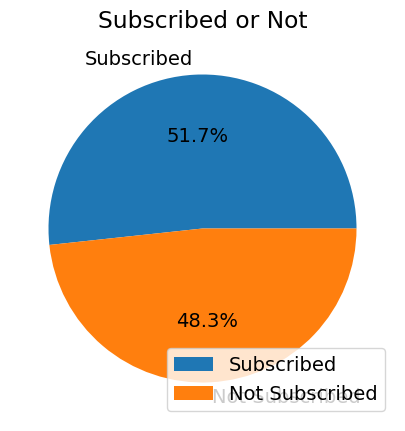

In [16]:
# prompt: make a pie chart for above code

import matplotlib.pyplot as plt

# Get the data from the previous code
subscribed_df = Country_df.copy().sort_values(by='Views', ascending=False)

# Create a pie chart
plt.pie(subscribed_df['Is Subscribed'].value_counts(), labels=['Subscribed', 'Not Subscribed'], autopct='%1.1f%%')

# Add title and legend
plt.title("Subscribed or Not")
plt.legend(loc='lower right')

# Show the pie chart
plt.show()


In [17]:
True_df = Country_df[Country_df['Is Subscribed'].eq(True)].sort_values(by='Views',ascending= False)
False_df = Country_df[Country_df['Is Subscribed'].eq(False)].sort_values(by='Views',ascending= False)
True_df['Video Title'].head(10).unique().tolist()

['How I Would Learn Data Science (If I Had to Start Over)',
 'The Best Free Data Science Courses Nobody is Talking About',
 '3 Proven Data Science Projects for Beginners (Kaggle)',
 'Beginner Kaggle Data Science Project Walk-Through (Titanic)',
 'Data Science Project from Scratch - Part 1 (Project Planning)',
 'The Projects You Should Do To Get A Data Science Job']



<center>
<div class="alert alert-block alert-info">
<b>INTERPRETATION: </b> Above are the videos that are most watched by people who have subsribed to the channel.

</div>
  </center>

<center>
<div class="alert alert-block alert-info">
<b>INTERPRETATION: </b> People who have subscribed to the channel are from US and Great Britain and contribute to the highest Average Watch Time.

</div>
  </center>

<center>
<div class="alert alert-block alert-info">
<b>INTERPRETATION: </b> The most amount of watchtime from the unsubscribed viewers come from Britain then US and then India.

</div>
  </center>

In [18]:
False_df['Video Title'].head(12).unique().tolist()

['How I Would Learn Data Science (If I Had to Start Over)',
 'The Best Free Data Science Courses Nobody is Talking About',
 '3 Proven Data Science Projects for Beginners (Kaggle)',
 'Data Science Certificate vs Bootcamp vs Masters Degree',
 "Why You Probably Won't Become a Data Scientist"]



<center>
<div class="alert alert-block alert-info">
<b>INTERPRETATION: </b> Above is the list of videos being watched the most by the unsubscribed viewers.


</div>
  </center>

<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: mediumseagreen;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Q. Who is Ken's core audience and what are they interested in?
    
</h2>
</div>
    
</center>

In [19]:
#Top 10 countries where the audience is from
ViewsbyCountry = Country_df[['Country Code', 'Views']].copy().sort_values(by='Views',ascending= False)
ViewsbyCountry.groupby('Country Code').sum().sort_values(by='Views',ascending= False).head(5)

,Views
Country Code,
US,1354450
IN,1155510
GB,239177
CA,222373
DE,172165





<center>
<div class="alert alert-block alert-info">
<b>INTERPRETATION: </b> People from US, India and Great Britain watch the videos the most.


</div>
  </center>

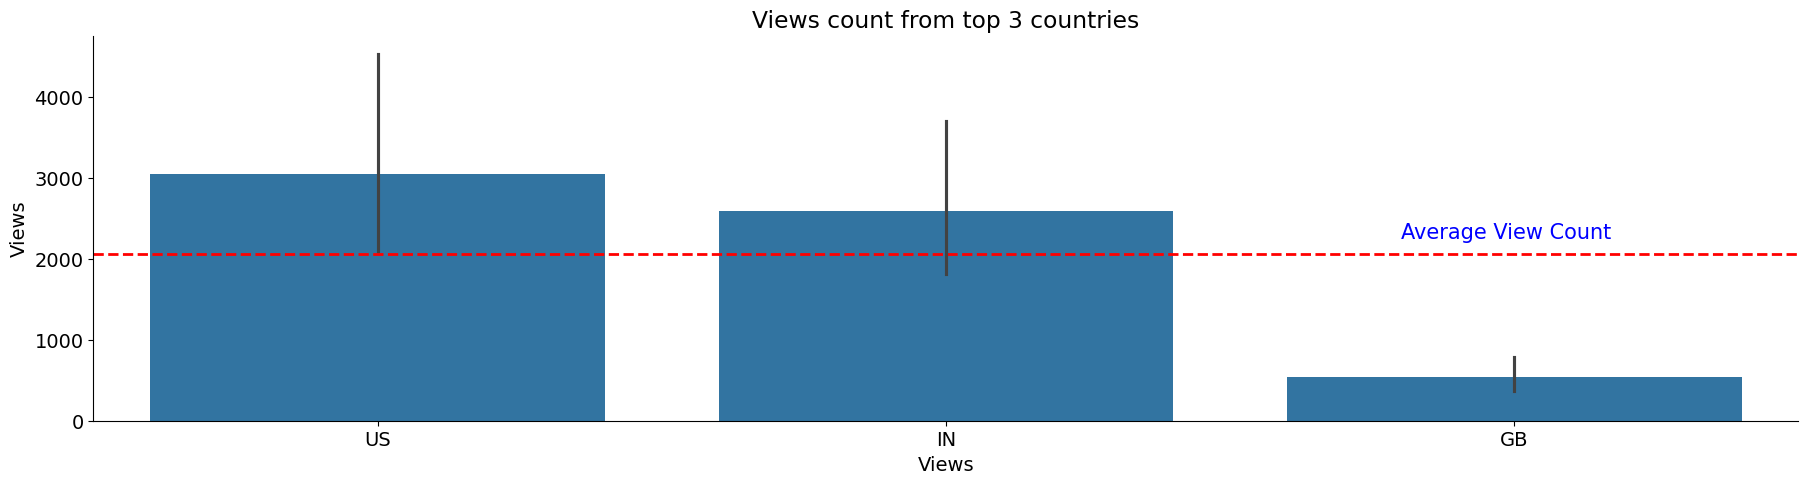

In [20]:
df = Country_df[['Video Title', 'Views', 'Average Watch Time', 'Country Code']].copy().sort_values(by='Views',ascending= False)
US_df = df[df['Country Code']=='US']
IN_df = df[df['Country Code']=='IN']
GB_df = df[df['Country Code']=='GB']
audience = pd.concat([US_df, IN_df, GB_df], axis=0, sort=False).sort_values(by='Views',ascending= False)

sns.barplot(x=audience['Country Code'] , y= audience['Views'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axhline(audience['Views'].mean(), linestyle='--', lw=2, zorder=1, color='red')
plt.annotate(f'Average View Count', (1.8, audience['Views'].mean()+200), fontsize=15, color='blue')

plt.title("Views count from top 3 countries")
plt.xlabel('Views')
plt.show()

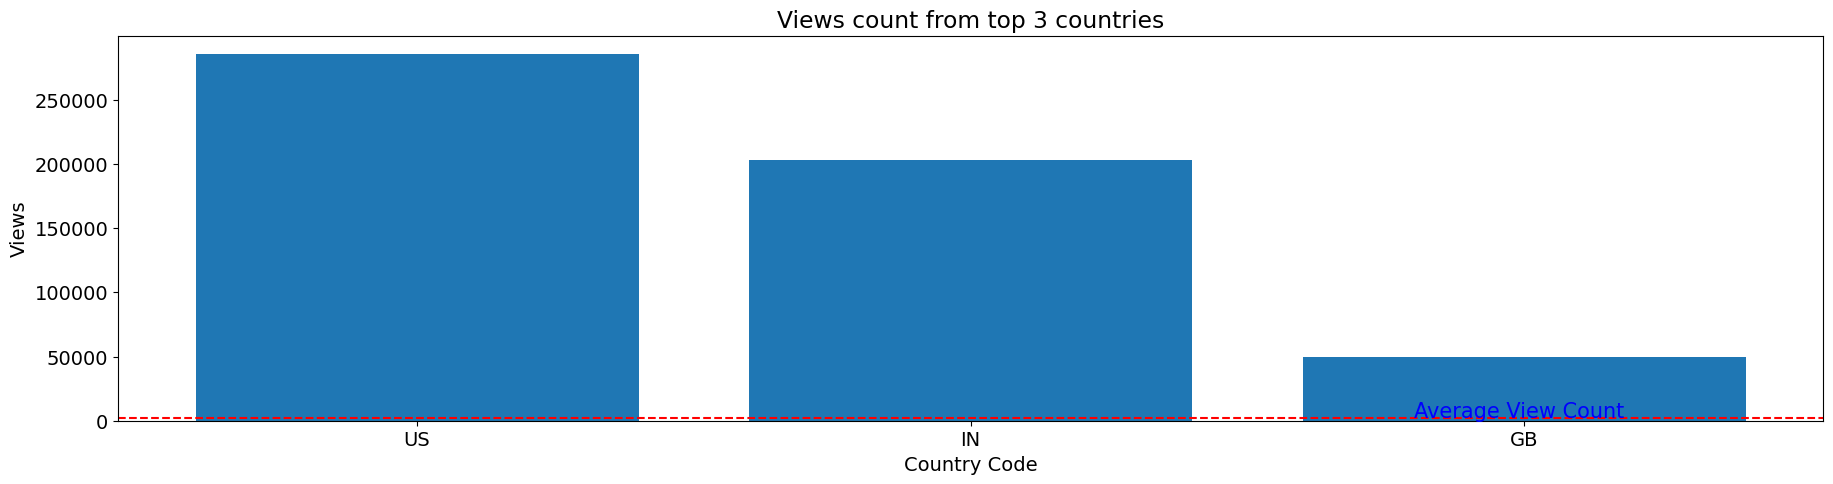

In [21]:
# prompt: make a bar graph for above code without sns

import matplotlib.pyplot as plt

# Create the bar chart
plt.bar(audience['Country Code'], audience['Views'])

# Add labels and title
plt.xlabel('Country Code')
plt.ylabel('Views')
plt.title('Views count from top 3 countries')

# Add a horizontal line for the average view count
plt.axhline(y=audience['Views'].mean(), color='red', linestyle='--')

# Add annotation for the average view count
plt.annotate('Average View Count', xy=(1.8, audience['Views'].mean() + 200), color='blue', fontsize=15)

# Show the plot
plt.show()


In [22]:
audience.groupby('Video Title').sum().sort_values(by='Views',ascending= False).head(5).index.tolist()

['How I Would Learn Data Science (If I Had to Start Over)',
 'The Best Free Data Science Courses Nobody is Talking About',
 '3 Proven Data Science Projects for Beginners (Kaggle)',
 'Beginner Kaggle Data Science Project Walk-Through (Titanic)',
 'The Projects You Should Do To Get A Data Science Job']





<center>
<div class="alert alert-block alert-info">
<b>INTERPRETATION: </b> The people from US, India and Great Britain watch these top 5 videos the most



</div>
  </center>

- 'How I Would Learn Data Science (If I Had to Start Over)',
- 'The Best Free Data Science Courses Nobody is Talking About',
- '3 Proven Data Science Projects for Beginners (Kaggle)',
- 'Beginner Kaggle Data Science Project Walk-Through (Titanic)',
- 'Data Science Certificate vs Bootcamp vs Masters Degree']

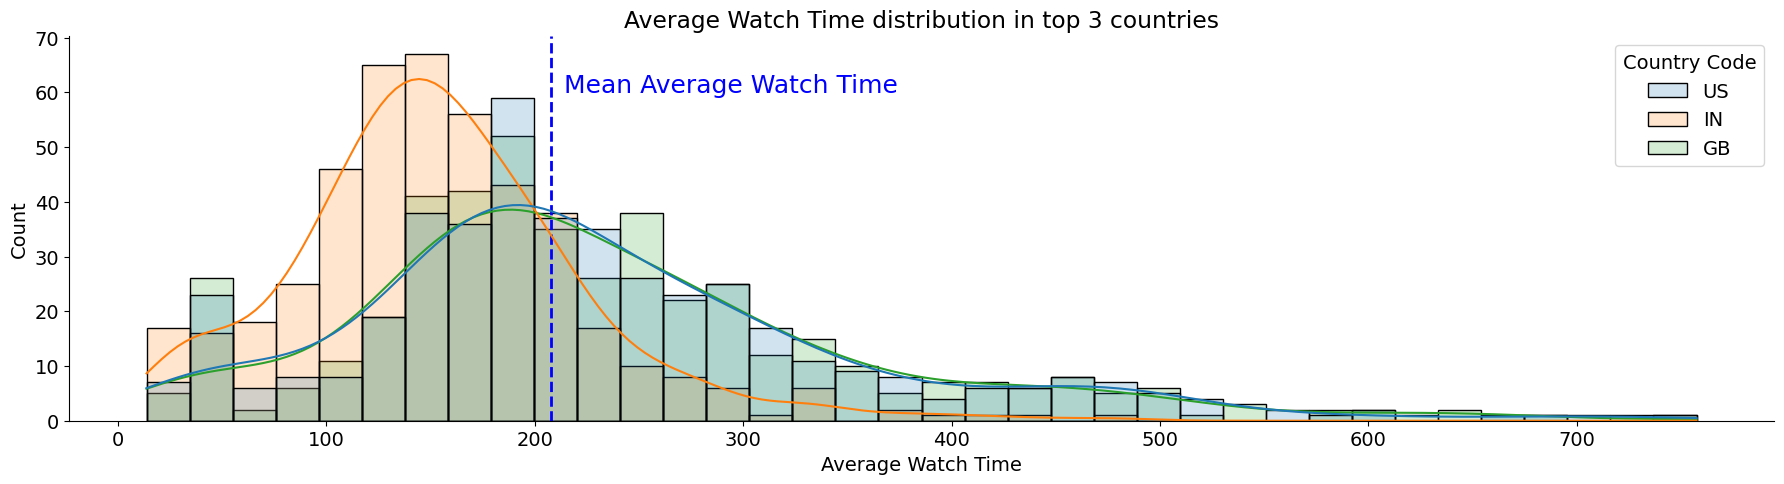

In [23]:
sns.histplot(data=audience, x=audience['Average Watch Time'], hue='Country Code', kde=True, alpha=0.2)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(audience['Average Watch Time'].mean(), linestyle='--', lw=2, zorder=1, color='blue')
plt.annotate(f' Mean Average Watch Time', (210, 60), fontsize=18,color='blue')
plt.title('Average Watch Time distribution in top 3 countries')
plt.show()

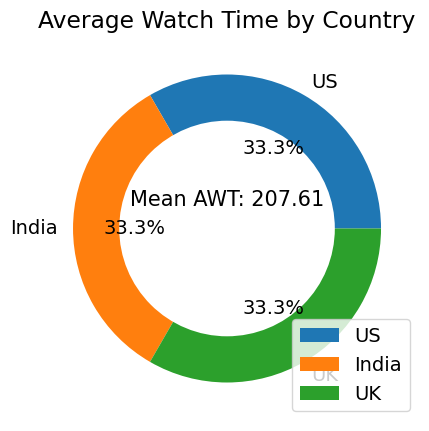

In [24]:
# prompt: make mean avearage time code with pie chart

import matplotlib.pyplot as plt
# Calculate the mean average watch time
mean_awt = audience['Average Watch Time'].mean()

# Create a pie chart
plt.pie(audience['Country Code'].value_counts(), labels=['US', 'India', 'UK'], autopct='%1.1f%%')

# Add a circle in the middle of the pie chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add text to the center of the pie chart
plt.text(0, 0.15, f'Mean AWT: {mean_awt:.2f}', fontsize=15, color='black', ha='center')

# Add title and legend
plt.title('Average Watch Time by Country')
plt.legend(loc='lower right')

# Show the pie chart
plt.show()


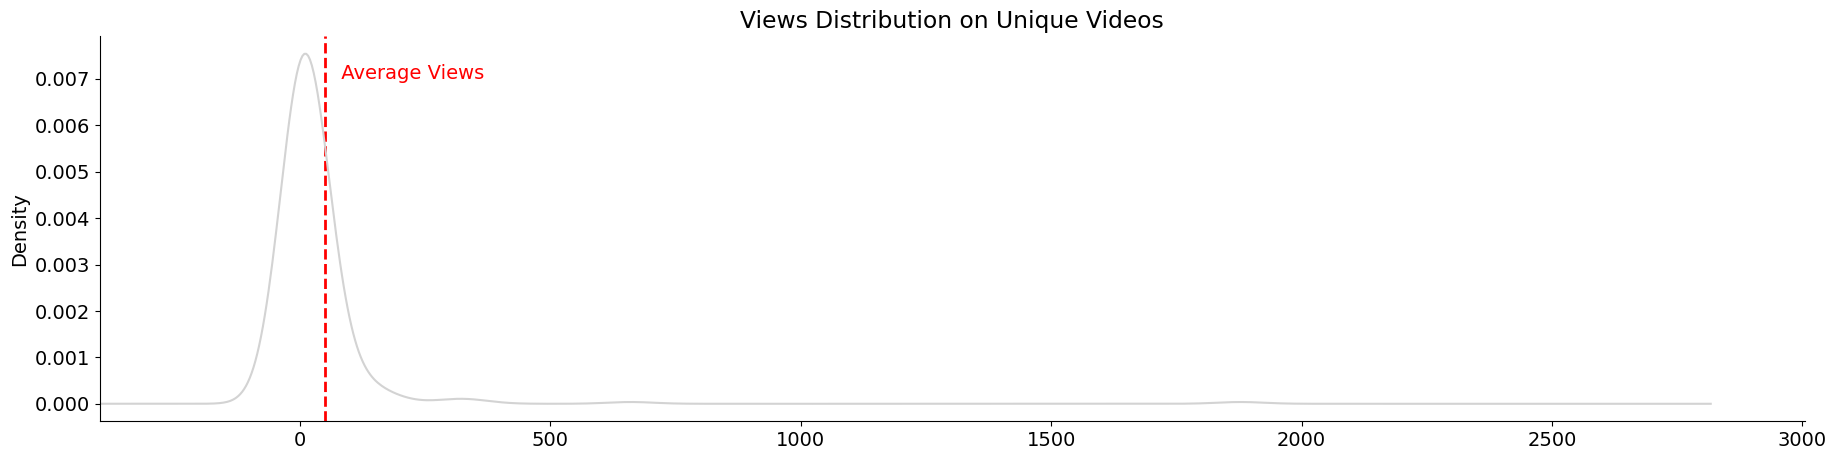

In [25]:
Video_df.drop_duplicates('Video Title')['Views'].plot(kind='kde', color='lightgray')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(Video_df['Views'].mean(), linestyle='--', lw=2, zorder=0, color='red')
plt.annotate(f' Average Views', (Video_df['Views'].mean()+20, 0.007),color='red')
plt.title('Views Distribution on Unique Videos')
plt.xlim(left = -400)
plt.show()

<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: mediumseagreen;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Q: What type of content are people engaging with the most or watching the longest?
    
</h2>
</div>
    
</center>

In [26]:
#Top 5 videos that have garnered the most views
Views_df = Video_df[['Video Title','External Video ID', 'Views']].copy().sort_values(by='Views',ascending= False)
Views_df.drop_duplicates('Video Title',inplace=True)
Views_df['Video Title'].head(10).values.tolist()

['How I Would Learn Data Science (If I Had to Start Over)',
 'How I Learned Data Science',
 'Reviewing Your Data Science Projects - Episode 5 (Very Detailed Project)',
 'Different Data Science Roles Explained (by a Data Scientist)',
 'Why I Quit Data Science',
 'The State of Data Science with Krish Naik & The Data Professor [Panel Discussion]',
 'How I Would Learn Data Science in 2022 (If I Had to Start Over)',
 "Why You Probably Won't Become a Data Scientist",
 'Is Data Science Right For You?',
 'Reviewing Your Data Science Projects - Episode 4 (Resume & Github)']



<center>
<div class="alert alert-block alert-info">
 From the results, evidently people are keen to know about



</div>
  </center>


- Data Science Roadmap
- Projects
- Roles in Datascience

In [27]:
Video_df.groupby('Video Title').sum().sort_values(by='Average Watch Time',ascending= False).head(5).index.tolist()

['Uber Driver to Machine Learning Engineer in 9 Months! (@Daniel Bourke) - KNN EP. 05',
 'Data Science Project from Scratch - Part 4 (Exploratory Data Analysis)',
 'Data Science Fundamentals: Data Manipulation in Python (Pandas)',
 'Data Science Project from Scratch - Part 3 (Data Cleaning)',
 'Advice from a Data Analytics CEO (@How to Get an Analytics Job) - KNN EP. 17']



<center>
<div class="alert alert-block alert-info">
Top 5 videos that have been watched the longest are:-




</div>
  </center>

- 'Uber Driver to Machine Learning Engineer in 9 Months! (@Daniel Bourke) - KNN EP. 05',
- 'Data Science Project from Scratch - Part 4 (Exploratory Data Analysis)',
- 'Data Science Fundamentals: Data Manipulation in Python (Pandas)',
- 'Data Science Project from Scratch - Part 3 (Data Cleaning)',
- 'Advice from a Data Analytics CEO (@How to Get an Analytics Job) - KNN EP. 17'

<center>
<div style="color:;
           displaya:fill;
           border-radius:5px;
           background-color: mediumseagreen;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Q. What are the themes of the comment data?
    
</h2>
</div>
    
</center>

In this section we will be doing Sentiment analysis of the comments and most commented video too.
<a id = Section4></a>

<center>
<div style="color:;
           displaya:fill;
           border-radius:5px;
           background-color: lightgray;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Sentiment analysis
    
</h2>
</div>
    
</center>


**Sentiment analysis**, also known as opinion mining, is a natural language processing (NLP) task that involves determining the sentiment or emotion expressed in a piece of text. The main goal of sentiment analysis is to understand whether the expressed opinion is positive, negative, neutral, or sometimes more granular emotions like happy, sad, angry, etc. This has numerous applications in various fields, such as market research, social media monitoring, customer feedback analysis, and more.

*Traditional sentiment analysis* approaches often relied on hand-crafted features and machine learning algorithms like Support Vector Machines (SVM), Naive Bayes, or logistic regression. These models required domain-specific feature engineering and lacked the ability to capture complex language patterns effectively.

In [28]:
print('Comments on videos - ', format(len(Comments_df['Comments'])))
print('Unique Videos - ', format(Comments_df['VidId'].nunique()))
print('Comments per Video -', format(int(len(Comments_df['Comments'])/Comments_df['VidId'].nunique())))

Comments on videos -  10240
Unique Videos -  222
Comments per Video - 46


In [29]:
def clean_text(text):
    text = text.lower().strip()
    text = re.sub(r"([-?.!,/\"])", '', text)
    text = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,']", "", text)
    text = re.sub(r"[ ]+", " ", text)
    text = re.sub('\n\n','', text)
    text = text.rstrip().strip()
    return text

In [30]:
clean_text(Comments_df['Comments'][0])

'thanks for this video keni decided to go into tech in 2018 by learning web development learnt a bit of html css and javascript my goals has since evolved through this period as i got interested in python programming and data sciencemy current interest now tends towards deep learning and aiinteresting my knowledge of front end web development will be very helpful in web scraping'

In [31]:
clean_comments = []
for i in range(len(Comments_df['Comments'])):
    try:
        clean_comments.append(clean_text(Comments_df['Comments'][i]))
    except:
        clean_comments.append('None')
    if i % 1000==0:
        print(f'{i} iteration(s) completed')
Comments_df['Clean Comments'] = clean_comments

0 iteration(s) completed
1000 iteration(s) completed
2000 iteration(s) completed
3000 iteration(s) completed
4000 iteration(s) completed
5000 iteration(s) completed
6000 iteration(s) completed
7000 iteration(s) completed
8000 iteration(s) completed
9000 iteration(s) completed
10000 iteration(s) completed


- **Polarity** is a float value within the range **[-1.0 to 1.0]**.
  
  - Here, **0** indicates **neutral**,
  
  - **+1** indicates a **very positive** sentiment, and
  
  - **-1** represents a **very negative** sentiment.


In [32]:
Comments_df.head()

,Comments,Comment_ID,Reply_Count,Like_Count,Date,VidId,user_ID,Clean Comments
0,Thanks for this video Ken.\n\nI decided to go ...,UgxFZTIzC4UPyhhX_PZ4AaABAg,0,0,2022-01-22T08:13:29Z,xpIFS6jZbe8,user_981,thanks for this video keni decided to go into ...
1,Hello ken jee!!! I'm doing a graduation on Com...,Ugx3IYuAufhb932GYQx4AaABAg,0,0,2022-01-22T01:09:46Z,xpIFS6jZbe8,user_213,hello ken jee im doing a graduation on compute...
2,"Thanks for this video, man. So useful. I'll me...",UgyhwwoK24arzRt1mud4AaABAg,0,0,2022-01-21T23:59:05Z,rEWPqw6rMGI,user_1065,thanks for this video man so useful ill meet y...
3,Great video!!! I started learning Python 8 mon...,UgwrrI7nd3WClsotmHV4AaABAg,0,0,2022-01-21T23:00:37Z,xpIFS6jZbe8,user_3391,great video i started learning python 8 months...
4,Been watching hours of your material (and Tina...,UgxlOrHO4MHKSwY9mUN4AaABAg,0,0,2022-01-21T20:24:20Z,sHRq-LshG3U,user_2816,been watching hours of your material and tina ...


In [35]:
print(Comments_df.columns)


Index(['Comments', 'Comment_ID', 'Reply_Count', 'Like_Count', 'Date', 'VidId',
       'user_ID', 'Clean Comments'],
      dtype='object')


In [40]:
from textblob import TextBlob

# Convert all values to strings, handling NaN or None values
Comments_df['polarity'] = Comments_df['Comments'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)


In [41]:
print('Reviews with Positive Sentiment based on Polarity :', len(Comments_df[Comments_df['polarity'] > 0]))
print('Reviews with Negative Sentiment based on Polarity :', len(Comments_df[Comments_df['polarity'] < 0]))
print('Reviews with Neutral Sentiment based on Polarity :', len(Comments_df[Comments_df['polarity'] == 0]))

Reviews with Positive Sentiment based on Polarity : 7255
Reviews with Negative Sentiment based on Polarity : 771
Reviews with Neutral Sentiment based on Polarity : 2214


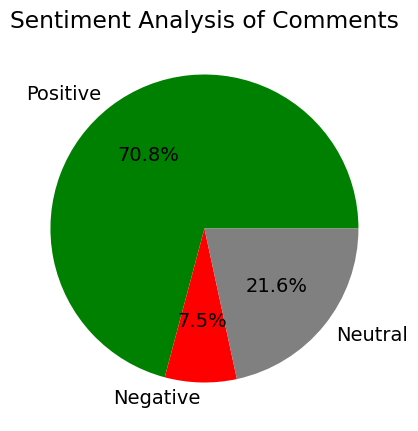

In [42]:
# prompt: make a pie chart

import matplotlib.pyplot as plt

# Define data
labels = ['Positive', 'Negative', 'Neutral']
sizes = [len(Comments_df[Comments_df['polarity'] > 0]), len(Comments_df[Comments_df['polarity'] < 0]), len(Comments_df[Comments_df['polarity'] == 0])]
colors = ['green', 'red', 'grey']

# Create pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Sentiment Analysis of Comments')
plt.show()


In [43]:
sentiment = []
for i in range(len(Comments_df['polarity'])):
    if Comments_df['polarity'][i] > 0:
        sentiment.append('Positive')
    elif Comments_df['polarity'][i] < 0:
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
Comments_df['sentiment'] = sentiment
print('Sentiment column has been added to the dataframe.')

Sentiment column has been added to the dataframe.


In [44]:
Comments_df.head()

,Comments,Comment_ID,Reply_Count,Like_Count,Date,VidId,user_ID,Clean Comments,polarity,sentiment
0,Thanks for this video Ken.\n\nI decided to go ...,UgxFZTIzC4UPyhhX_PZ4AaABAg,0,0,2022-01-22T08:13:29Z,xpIFS6jZbe8,user_981,thanks for this video keni decided to go into ...,0.191667,Positive
1,Hello ken jee!!! I'm doing a graduation on Com...,Ugx3IYuAufhb932GYQx4AaABAg,0,0,2022-01-22T01:09:46Z,xpIFS6jZbe8,user_213,hello ken jee im doing a graduation on compute...,0.433333,Positive
2,"Thanks for this video, man. So useful. I'll me...",UgyhwwoK24arzRt1mud4AaABAg,0,0,2022-01-21T23:59:05Z,rEWPqw6rMGI,user_1065,thanks for this video man so useful ill meet y...,0.250000,Positive
3,Great video!!! I started learning Python 8 mon...,UgwrrI7nd3WClsotmHV4AaABAg,0,0,2022-01-21T23:00:37Z,xpIFS6jZbe8,user_3391,great video i started learning python 8 months...,0.456667,Positive
4,Been watching hours of your material (and Tina...,UgxlOrHO4MHKSwY9mUN4AaABAg,0,0,2022-01-21T20:24:20Z,sHRq-LshG3U,user_2816,been watching hours of your material and tina ...,0.341667,Positive


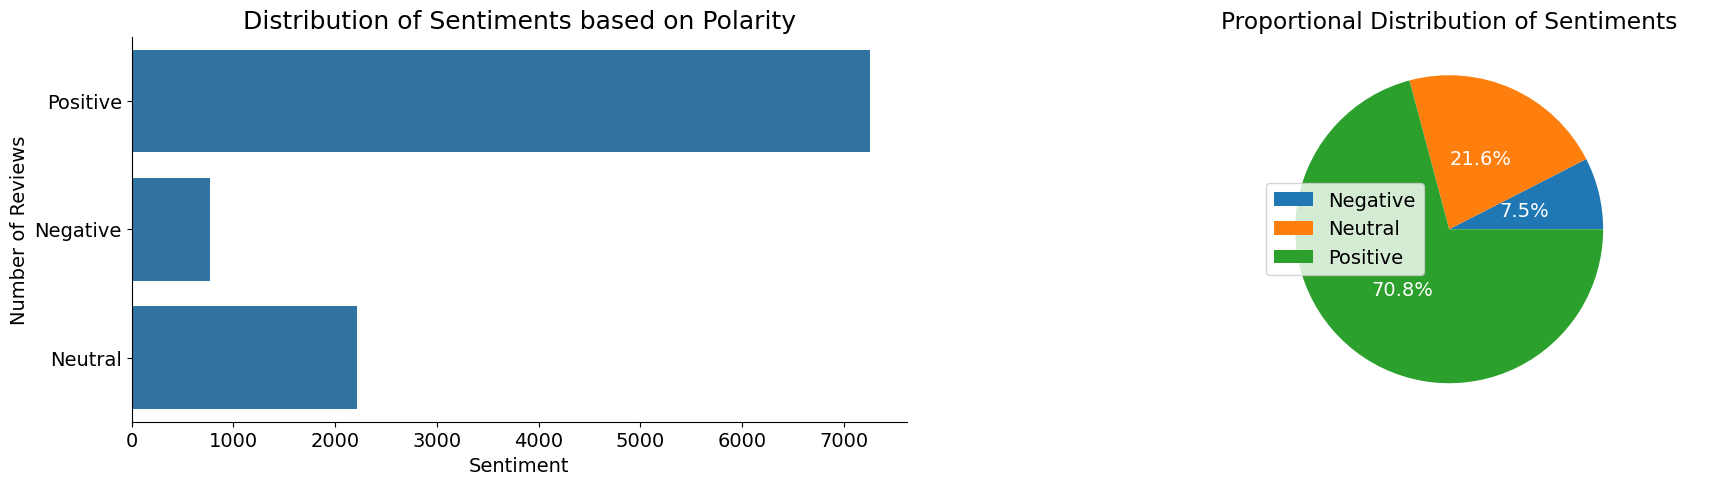

In [45]:
# Plotting the Count and Proportional Distribution of reviews based on sentiment as per polarity
plt.subplot(1, 2, 1)

# Plotting the count of reviews for each sentiment
sns.countplot(Comments_df['sentiment'],  )
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Sentiments based on Polarity', fontsize=18)

plt.subplot(1, 2, 2)
# Plotting the proportional distribution of sentiments
plt.pie(x=[len(Comments_df[Comments_df['polarity'] < 0]), len(Comments_df[Comments_df['polarity'] == 0]),
           len(Comments_df[Comments_df['polarity'] > 0])],
        labels=['Negative', 'Neutral', 'Positive'], autopct='%1.1f%%', pctdistance=0.5,
        textprops={'fontsize':14, 'color':'white'})
plt.title('Proportional Distribution of Sentiments')
plt.legend()
plt.show()

In [46]:
#Making a new dataframe for further use
df=Comments_df[['VidId','polarity','sentiment' ]].copy()

<a id = Section4.1></a>

<center>
<div style="color:;
           displaya:fill;
           border-radius:5px;
           background-color: lightblue;
           font-size:110%;
           letter-spacing:0.5px">

<h3 style="padding: 10px;
              color:black;">Sentiment analysis Using BERT
    
</h3>
</div>

BERT (*Bidirectional Encoder Representations from Transformers*) is a deep learning model introduced by Google in 2018, which significantly advanced the field of NLP. Unlike traditional models that process text in a sequential manner, BERT utilizes a transformer-based architecture, enabling it to capture the context of words bidirectionally (both left and right) in a sentence.

Here's a brief overview of BERT's architecture and its key components:

1. **Transformer Encoder**: The transformer architecture relies on self-attention mechanisms, allowing it to weigh the importance of different words in the context of the whole sentence. This attention mechanism is used to generate contextualized word embeddings for each word in the sentence.

2. **Pre-training**: BERT is pre-trained on a large corpus of text using a masked language model objective. During pre-training, some words in the input are randomly masked, and the model is trained to predict the masked words based on the surrounding context. This process helps BERT learn rich contextual representations of words.

3. **Fine-tuning**: After pre-training, BERT is fine-tuned on specific downstream tasks like sentiment analysis. During fine-tuning, the model's weights are adjusted to adapt it to the target task.

Now, let's discuss how BERT makes sentiment analysis more effective and easier:

1. **Contextual Word Representations**: BERT's bidirectional nature enables it to understand the context in which a word appears in a sentence. This contextual understanding allows BERT to capture nuances in sentiment, such as sarcasm or negation, which were challenging for traditional methods to handle.

2. **Transfer Learning**: BERT is pre-trained on a large amount of general text data. This pre-training captures a wide range of language patterns and features, making it highly effective for a wide array of NLP tasks, including sentiment analysis. Fine-tuning on task-specific data further refines the model's performance.

3. **No Need for Hand-Crafted Features**: BERT does not require extensive hand-crafted feature engineering. It automatically learns and represents features from the data during pre-training and fine-tuning.

4. **State-of-the-art Performance**: BERT has achieved state-of-the-art performance on various NLP benchmarks, including sentiment analysis tasks, surpassing the performance of many traditional models.

So, BERT's bidirectional contextual word representations and transfer learning capabilities have revolutionized the field of sentiment analysis. By capturing the rich context and semantics of language, BERT offers superior performance and simplifies the process of sentiment analysis, making it a breeze compared to traditional approaches.

In [47]:
#Downloading the model and the tokenizer
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [48]:
tokens = tokenizer.encode(Comments_df['Comments'][0], return_tensors='pt')
result = model(tokens)
print(f'The sentiment of the first comment is {int(torch.argmax(result.logits))+1}')

The sentiment of the first comment is 5


In [49]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [50]:
for i in range(0,10):
    score = sentiment_score(Comments_df['Comments'][i])
    comment = Comments_df['Comments'][i]
    print(f'Comment : {comment[0:100]}, Score : {score}.')
    print('\n')

Comment : Thanks for this video Ken.

I decided to go into Tech in 2018 by learning web development. Learnt a , Score : 5.


Comment : Hello ken jee!!! I'm doing a graduation on Computer Science and i really keen to learn Data Science., Score : 5.


Comment : Thanks for this video, man. So useful. I'll meet you when I'm a Senior Lead Data Scientist at the Co, Score : 5.


Comment : Great video!!! I started learning Python 8 months ago and quickly became interested in DS, I have a , Score : 5.


Comment : Been watching hours of your material (and Tina) because while I do know that it is not an easy field, Score : 5.


Comment : Hey Ken! I am almost finishing my university degreed in market research & marketing and I am going t, Score : 2.


Comment : So basically is it modest to say that the silver bullet to get into a good role is:
➡️to have had So, Score : 3.


Comment : Hi Ken, as always, your videos are insightful and easy to follow. Would you say that  one of the mai, Score : 4.




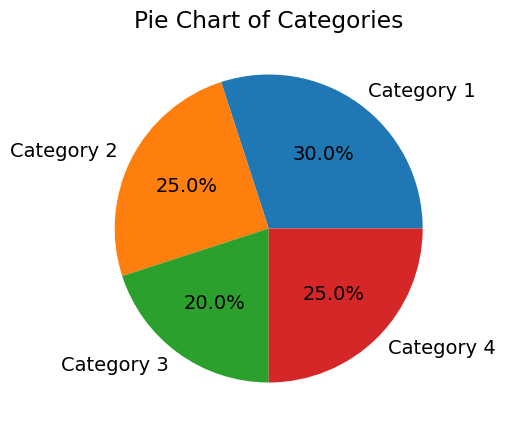

In [51]:
# prompt: make a pir chart

import matplotlib.pyplot as plt

# Create data
labels = ["Category 1", "Category 2", "Category 3", "Category 4"]
sizes = [30, 25, 20, 25]

# Create a pie chart
plt.pie(sizes, labels=labels, autopct="%1.1f%%")

# Add title
plt.title("Pie Chart of Categories")

# Show the pie chart
plt.show()


We can see how easy it is to get the sentiment analysis with the BERT model. This allows us to spend more time on analysis rather than figuring out how to build the pipeline here. I have not ran the algo on the whole comments because of the limited computational power here on Kaggle

<center>
<div style="color:;
           displaya:fill;
           border-radius:5px;
           background-color: lightgray;
           font-size:110%;
           letter-spacing:0.5px">

<h3 style="padding: 10px;
              color:black;">Top Vids (with highest positive polarity)
    
</h3>
</div>
    
</center>

In [52]:
df.sort_values(by='polarity',ascending= False).head(5)

,VidId,polarity,sentiment
2857,pPfw2fzwNiM,1.0,Positive
2197,Q9FjwzKFPuM,1.0,Positive
1197,k8YxyrcAXJs,1.0,Positive
3485,n3vw0M5RrPU,1.0,Positive
5382,UpaEjBOMNqs,1.0,Positive


<center>
<div style="color:;
           displaya:fill;
           border-radius:5px;
           background-color: lightgray;
           font-size:110%;
           letter-spacing:0.5px">

<h3 style="padding: 10px;
              color:black;">Bottom Vids (with highest negative polarity)
    
</h3>
</div>
    
</center>

In [53]:
df.sort_values(by='polarity',ascending= False).tail(5)

,VidId,polarity,sentiment
9956,T77uVbLhroQ,-0.9100,Negative
4081,qV_AlRwhI3I,-0.9375,Negative
29,Q9FjwzKFPuM,-1.0000,Negative
6726,4OZip0cgOho,-1.0000,Negative
5078,agHKuUoMwvY,-1.0000,Negative


<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: mediumseagreen;
           font-size:110%;
           letter-spacing:0.5px">

<h3 style="padding: 10px;
              color:white;">Words Used In Positive Comments
    
</h3>
</div>
    
</center>

We will be using something known as Word Cloud to visualize the words.

What is Word Cloud you ask? Well, A **word cloud** is a visual representation of text data where the most frequently occurring words in a given piece of text are displayed in a graphical form. In a word cloud, the size of each word is proportional to its frequency in the text. The more frequently a word appears in the text, the larger and bolder it appears in the word cloud.

Word clouds are often used to **provide a quick and intuitive overview** of the most important or commonly used words in a document, a collection of documents, or any other textual data source. They are particularly useful for identifying key themes, topics, or sentiments present in the text.

Creating a word cloud typically involves the following steps:

1. **Text Processing**: The text data is preprocessed to remove common stop words (e.g., "the," "is," "and," etc.) and other irrelevant or noisy words. The remaining words are then used to build the word cloud.

2. **Word Frequency Count**: The frequency of each word is calculated to determine how often it appears in the text.

3. **Word Cloud Visualization**: The words and their respective frequencies are represented graphically in the form of a word cloud. The more frequent a word, the larger and more prominent it appears in the cloud.

Word clouds are often used for various purposes, such as:

- Visualizing the content of a document or an article.
- Understanding the most common topics discussed in customer reviews, feedback, or social media comments.
- Analyzing responses in surveys to identify prevalent keywords or themes.
- Gaining insights into the vocabulary used in a specific domain or text corpus.
- Creating visually appealing artwork or illustrations based on text data.

Word clouds are easy to interpret and provide a quick overview of the most relevant information in a visually engaging manner. However, it's important to note that word clouds have limitations, particularly when dealing with large volumes of text. They may not capture the full context of the text or convey more intricate relationships between words. In some cases, more advanced text analysis techniques, such as topic modeling or sentiment analysis, may be required for deeper insights into the textual data.

In [54]:
wordcloud = WordCloud(width=2500, height=2000, max_words=50,
                      background_color='White').generate(str(Comments_df[(Comments_df['polarity'] > 0)].sample(1000,
                     random_state=0)['Clean Comments']))

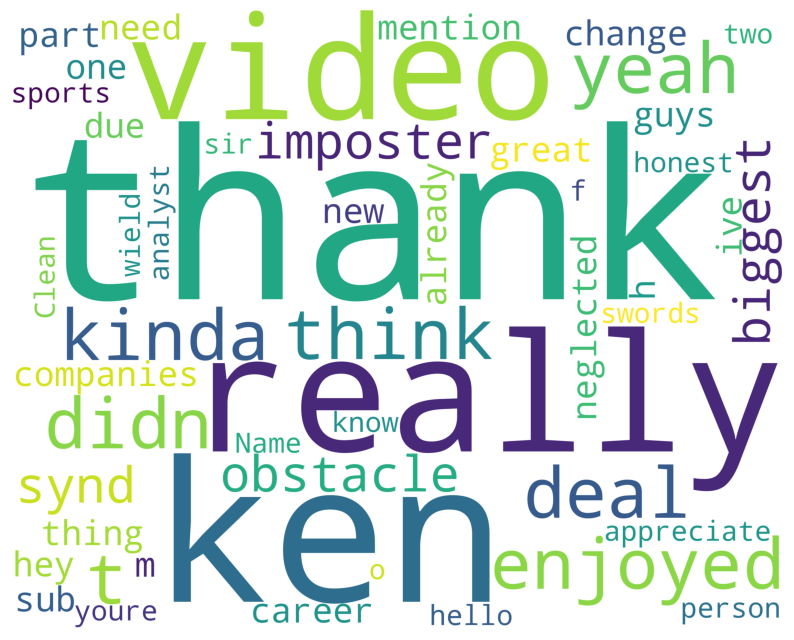

In [55]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

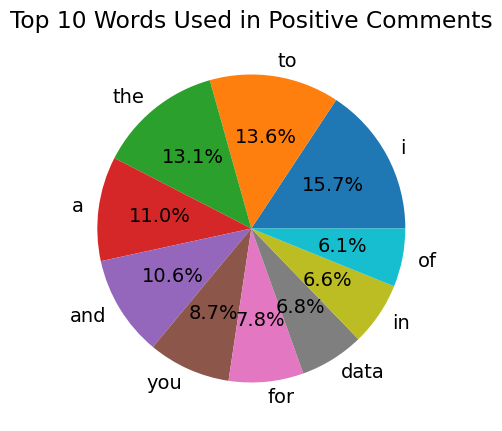

In [56]:
# prompt: plot a pie chart for above code

import matplotlib.pyplot as plt
# Create a dictionary to store the word counts
word_counts = {}

# Loop through the comments and count the words
for comment in Comments_df[(Comments_df['polarity'] > 0)].sample(1000, random_state=0)['Clean Comments']:
  for word in comment.split():
    if word not in word_counts:
      word_counts[word] = 0
    word_counts[word] += 1

# Create a list of tuples sorted by word count
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Extract the top 10 words and their counts
top_words = sorted_words[:10]

# Create a list of labels and values for the pie chart
labels, values = zip(*top_words)

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Top 10 Words Used in Positive Comments')
plt.show()


<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: mediumseagreen;
           font-size:110%;
           letter-spacing:0.5px">

<h3 style="padding: 10px;
              color:white;">Words Used in Negative Comments
    
</h3>
</div>
    
</center>

In [57]:
wordcloud = WordCloud(width=2500, height=2000, max_words=50,
                      background_color='White').generate(str(Comments_df[(Comments_df['polarity'] < 0)].sample(100,
                     random_state=0)['Clean Comments']))

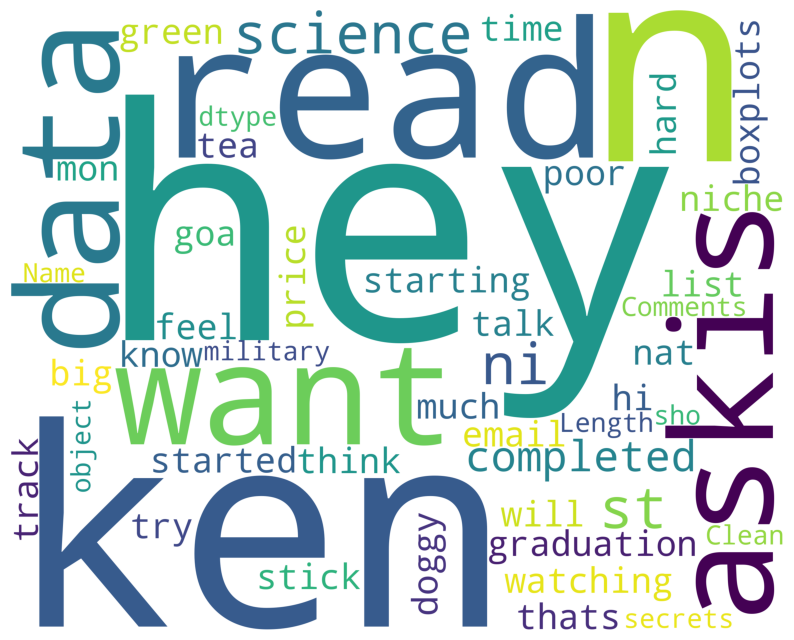

In [58]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

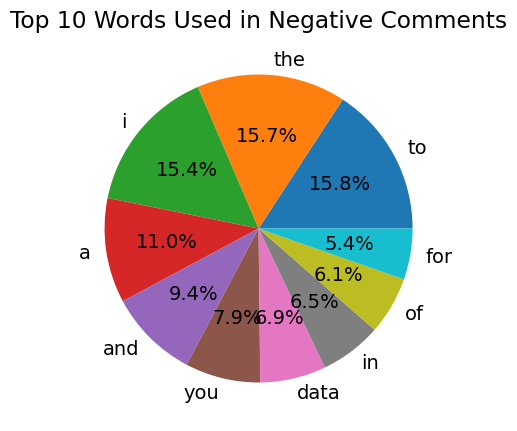

In [59]:
# prompt: make a pie chart for above code

import matplotlib.pyplot as plt
# Create a dictionary to store the word counts
word_counts = {}

# Loop through the comments and count the words
for comment in Comments_df[(Comments_df['polarity'] < 0)].sample(100, random_state=0)['Clean Comments']:
  for word in comment.split():
    if word not in word_counts:
      word_counts[word] = 0
    word_counts[word] += 1

# Create a list of tuples sorted by word count
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Extract the top 10 words and their counts
top_words = sorted_words[:10]

# Create a list of labels and values for the pie chart
labels, values = zip(*top_words)

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Top 10 Words Used in Negative Comments')
plt.show()


<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: mediumpurple;
           font-size:110%;
           letter-spacing:0.5px">

<h3 style="padding: 5px;
              color:white;">Most Commented Video
    
</h3>
</div>
    
</center>

In [60]:
topcommentsdf = pd.pivot_table(Comments_df, index = 'VidId', values = 'Comment_ID', aggfunc = 'count')
topcommentsdf = topcommentsdf.sort_values('Comment_ID', ascending = False)
New_df = topcommentsdf.merge(Aggregated_df,left_on='VidId', right_on='Video' )
New_df.groupby('Video title').sum().sort_values(by='Comment_ID',ascending= False).reset_index().head(5)

,Video title,Comment_ID,Video,Video pub­lish time,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Av­er­age view dur­a­tion,Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%)
0,How I Would Learn Data Science (If I Had to St...,797,4OZip0cgOho,"May 8, 2020",907,9583,942,46903,451,46904,6.353,12.835,36.65,0:03:09,1253559,65850.7042,46453,7959.533,26498799,3.14
1,The Best Free Data Science Courses Nobody is T...,262,Ip50cXvpWY4,"Mar 9, 2020",294,4694,75,19464,131,10734,4.097,9.124,33.80,0:02:06,297222,10465.0467,10603,1217.046,4512254,3.24
2,Data Science Certificate vs Bootcamp vs Master...,224,Q9FjwzKFPuM,"Jan 18, 2020",239,456,48,2708,37,1576,8.315,17.543,36.21,0:05:53,92355,9057.2752,1539,767.493,2247912,2.78
3,How I Would Learn Data Science in 2021 (What H...,219,41Clrh6nv1s,"Dec 19, 2020",232,741,63,5869,57,3358,7.526,15.786,41.01,0:03:45,123515,7724.2735,3301,929.400,1699309,3.93
4,3 Proven Data Science Projects for Beginners (...,205,8igH8qZafpo,"Feb 17, 2020",220,1935,64,14708,72,9508,3.733,9.247,35.26,0:02:40,237467,10560.3597,9436,885.504,3137644,4.01


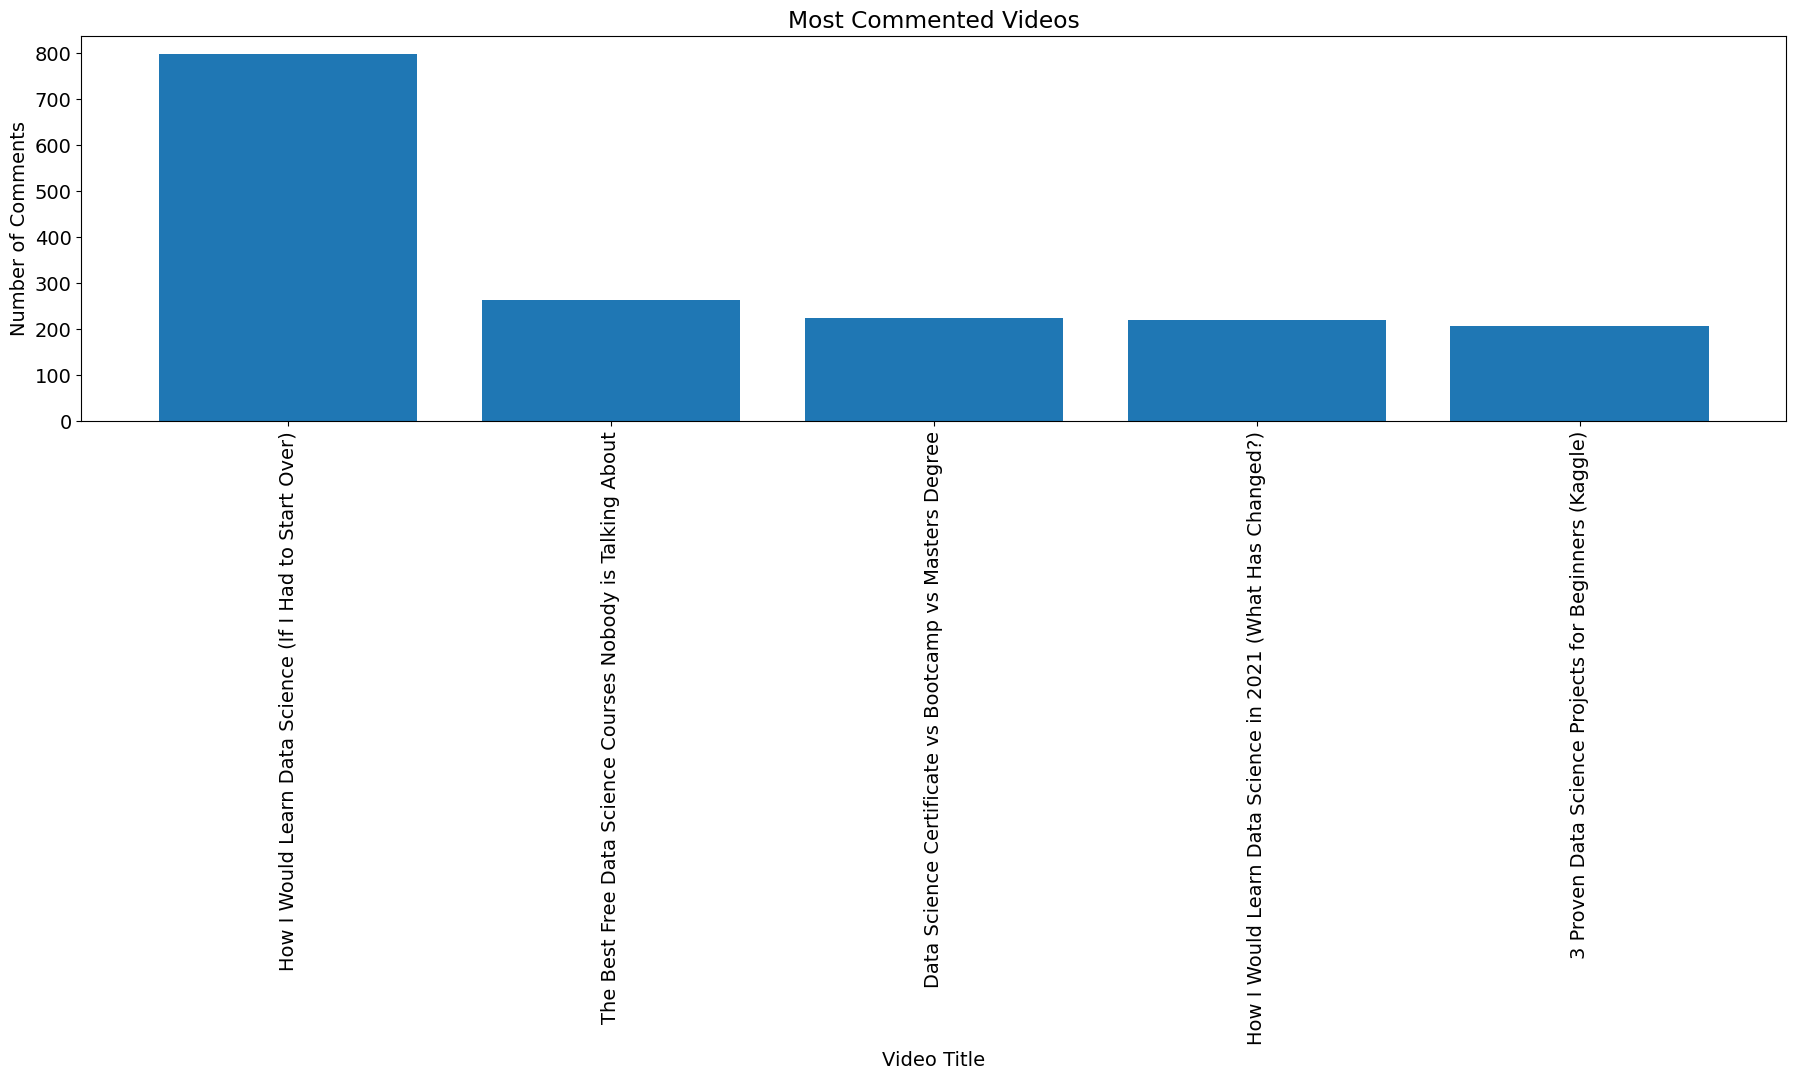

In [61]:
# prompt: make a bar chart for above code

import matplotlib.pyplot as plt

# Get the data from the provided code
data = New_df.groupby('Video title').sum().sort_values(by='Comment_ID',ascending= False).reset_index().head(5)

# Create the bar chart
plt.bar(data['Video title'], data['Comment_ID'])
plt.xlabel('Video Title')
plt.ylabel('Number of Comments')
plt.title('Most Commented Videos')
plt.xticks(rotation=90)
plt.show()


<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: mediumseagreen;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Q. What types of video titles and thumbnails drive the most traffic?
    
</h2>
</div>
    
</center>

In [62]:
df = Video_df[['Video Title','Thumbnail link', 'Average View Percentage','Average Watch Time']].copy()
df.sort_values(by='Average Watch Time',ascending= False).drop_duplicates('Video Title')['Video Title'].head(10).values.tolist()

['Ken Jee Q & A Live Stream (50,000 Sub Special!)',
 '100K Channel Update + AMA Stream!',
 'Data Science Explained with ... Cooking?',
 'Sports Analytics & Streaming Data Science on Twitch (Nick Wan) - KNN EP. 08',
 'Data Science Fundamentals: Data Cleaning in Python',
 'I Eat a Papaya Live on Stream (Plus Q&A for 150K Subs!)',
 'His Startup Will Land You a Data Science Job (Jeremie Harris) - KNN EP. 15',
 'The Data Science Interview: What to Expect',
 'Data Science Productivity, Motivation, and Organization (ft. Data Professor & Codebasics)',
 'Fast Cars to Faster Data (Alex Castrounis) - KNN EP. 12']


<center>
<div class="alert alert-block alert-info">
Video titles with words Live, Stream, Fundamentals and Data Science gets the most traffic


</div>
  </center>


<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: mediumseagreen;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Q. What types of videos have led to the most growth?
    
</h2>
</div>
    
</center>

In [63]:
df=Aggregated_df[['Video','Video title','Sub­scribers gained' ]].copy()
df.sort_values(by='Sub­scribers gained',ascending= False).drop([0]).head(5)['Video title'].values.tolist()

['How I Would Learn Data Science (If I Had to Start Over)',
 'The Best Free Data Science Courses Nobody is Talking About',
 '3 Proven Data Science Projects for Beginners (Kaggle)',
 'How I Would Learn Data Science in 2021 (What Has Changed?)',
 'Data Science Project from Scratch - Part 1 (Project Planning)']